Saving download.jfif to download (2).jfif


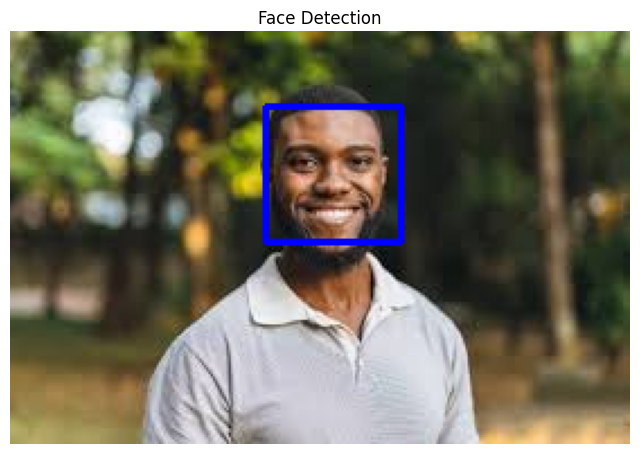

In [26]:
# Step 1: Install OpenCV (if not already)
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
from matplotlib import pyplot as plt
from google.colab import files
import os

# Step 3: Upload image from your local system
uploaded = files.upload()  # Choose a face image, e.g., download.jpg

# Step 4: Download Haar cascade XML (face detector model)
haar_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
haar_file = 'haarcascade_frontalface_default.xml'

if not os.path.exists(haar_file):
    !wget $haar_url -O $haar_file

# Step 5: Load the uploaded image
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

# Step 6: Face detection logic
if img is None:
    print("Error: Could not load image file.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load face detector
    face_cascade = cv2.CascadeClassifier(haar_file)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Convert image to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the result using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title('Face Detection')
    plt.axis('off')
    plt.show()